1.veri seti incelemesi

2.makine öğrenmesi modelinin seçilmesi  # KNN

3.modelin train edilmesi 

4.sonuçların değerlendirilmesi  : test

5.hiperparametre ayarlaması

In [1]:
from sklearn.datasets import load_breast_cancer

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
cancer = load_breast_cancer()

In [4]:
dataFrameCancer = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

In [5]:
dataFrameCancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
dataFrameCancer["target"] = cancer.target

In [7]:
dataFrameCancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [8]:
dataFrameCancer.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [9]:
dataFrameCancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [10]:
dataFrameCancer.max()

mean radius                  28.11000
mean texture                 39.28000
mean perimeter              188.50000
mean area                  2501.00000
mean smoothness               0.16340
mean compactness              0.34540
mean concavity                0.42680
mean concave points           0.20120
mean symmetry                 0.30400
mean fractal dimension        0.09744
radius error                  2.87300
texture error                 4.88500
perimeter error              21.98000
area error                  542.20000
smoothness error              0.03113
compactness error             0.13540
concavity error               0.39600
concave points error          0.05279
symmetry error                0.07895
fractal dimension error       0.02984
worst radius                 36.04000
worst texture                49.54000
worst perimeter             251.20000
worst area                 4254.00000
worst smoothness              0.22260
worst compactness             1.05800
worst concav

In [11]:
dataFrameCancer.min()

mean radius                  6.981000
mean texture                 9.710000
mean perimeter              43.790000
mean area                  143.500000
mean smoothness              0.052630
mean compactness             0.019380
mean concavity               0.000000
mean concave points          0.000000
mean symmetry                0.106000
mean fractal dimension       0.049960
radius error                 0.111500
texture error                0.360200
perimeter error              0.757000
area error                   6.802000
smoothness error             0.001713
compactness error            0.002252
concavity error              0.000000
concave points error         0.000000
symmetry error               0.007882
fractal dimension error      0.000895
worst radius                 7.930000
worst texture               12.020000
worst perimeter             50.410000
worst area                 185.200000
worst smoothness             0.071170
worst compactness            0.027290
worst concav

{'whiskers': [<matplotlib.lines.Line2D at 0x1ff35d81690>,
 'caps': [<matplotlib.lines.Line2D at 0x1ff35d81cf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ff35d812a0>,
 'medians': [<matplotlib.lines.Line2D at 0x1ff35d82170>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ff35d83490>,
 'means': []}

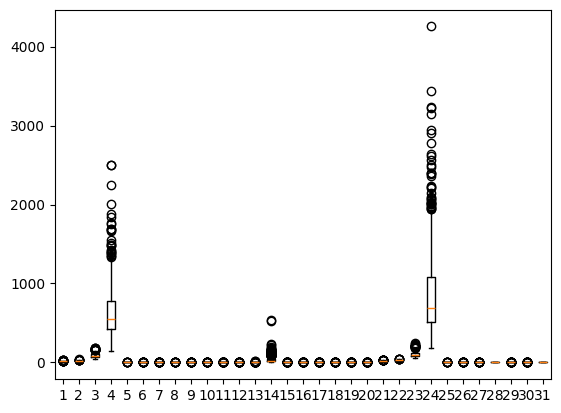

In [12]:
plt.boxplot(dataFrameCancer)

In [13]:
# KNN MODELİNİ SEÇTİK VE İMPORT EDİYORUZ
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler  # standardizasyon işlemleri için

In [14]:
# KNN MODELİ OLUŞTRUR VE TRAİN ET
# KOMŞU PARAMETREİSNİ UNUTMA
knn = KNeighborsClassifier(n_neighbors=3)

In [15]:
#features
X = cancer.data
#targets
y = cancer.target

In [16]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
# STANDARDİZASYON İŞLEMİ (ölçeklendşrme)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# fit fonksiyonu verimizi (samples + targets) kullanarak knn algoritmasını eğitir
knn.fit(X_train,y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [19]:
y_pred = knn.predict(X_test)

In [20]:
# confusion_matrix (karışıklık matrisi), bir sınıflandırma modelinin ne kadar iyi çalıştığını ayrıntılı şekilde değerlendirmek için kullanılır. Modelin doğru ve yanlış tahminlerini tablo (matris) biçiminde özetler.

from sklearn.metrics import accuracy_score , confusion_matrix

In [21]:
# doğruluk skorunu hesaplayacağız
accuracy = accuracy_score(y_test,y_pred)

In [22]:
print("Doğruluk : " ,accuracy)

Doğruluk :  0.9473684210526315


In [23]:
conf_matrix = confusion_matrix(y_test,y_pred)

In [24]:
print("confusion matrix:\n ", conf_matrix)

confusion matrix:
  [[40  3]
 [ 3 68]]


hiperparametre ayarlanması

amaç accuracyi arttırmak

    KNN HİPERPARAMETER : k
    
    k : 1,2,3,...N
    
    ACCURACY : %A, %B, %C....


In [25]:
accuracy_values=[]
k_values=[]
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    accuracy_values.append(accuracy)
    k_values.append(k) 

In [26]:
for k, acc in zip(k_values, accuracy_values):
    print(f"k = {k}, accuracy = {acc:.4f}")


k = 1, accuracy = 0.9386
k = 2, accuracy = 0.9386
k = 3, accuracy = 0.9474
k = 4, accuracy = 0.9561
k = 5, accuracy = 0.9474
k = 6, accuracy = 0.9561
k = 7, accuracy = 0.9474
k = 8, accuracy = 0.9561
k = 9, accuracy = 0.9649
k = 10, accuracy = 0.9561
k = 11, accuracy = 0.9561
k = 12, accuracy = 0.9561
k = 13, accuracy = 0.9561
k = 14, accuracy = 0.9561
k = 15, accuracy = 0.9561
k = 16, accuracy = 0.9561
k = 17, accuracy = 0.9474
k = 18, accuracy = 0.9561
k = 19, accuracy = 0.9474
k = 20, accuracy = 0.9561


In [27]:
sonuclar = pd.DataFrame({    'k': k_values,
    'accuracy': accuracy_values})

In [28]:
sonuclar

,k,accuracy
0,1,0.938596
1,2,0.938596
2,3,0.947368
3,4,0.956140
4,5,0.947368
5,6,0.956140
6,7,0.947368
7,8,0.956140
8,9,0.964912
9,10,0.956140


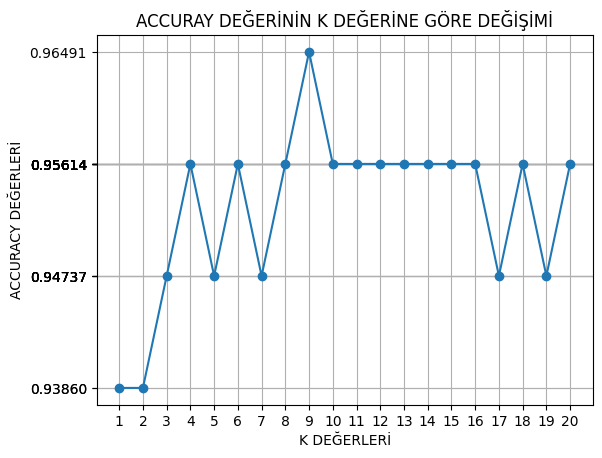

In [29]:
plt.figure()
plt.plot(k_values,accuracy_values,marker="o",linestyle="-")
plt.title("ACCURAY DEĞERİNİN K DEĞERİNE GÖRE DEĞİŞİMİ")
plt.xlabel("K DEĞERLERİ")
plt.ylabel("ACCURACY DEĞERLERİ")
plt.xticks(k_values)
plt.yticks(accuracy_values)
plt.grid(True)